In [2]:
import numpy as np
import pylab as pl
# nice looking plots
import seaborn
from scipy.optimize import curve_fit, minimize

%pylab inline



Populating the interactive namespace from numpy and matplotlib


# Chi-Squared Distribution

In [3]:
# choosing distributions = 'chisq'
distributions = ['chisq']

In [4]:
mymean = 100
# giving it a mean

In [5]:
df = mymean
# assigning 100

Text(0.5,1,'Mean of the Samples')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


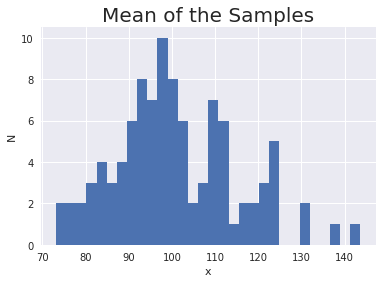

In [25]:
md = {}
# creating an empty dictionary
md['chisq'] = np.random.chisquare(df, size=100)
# passing the object 'chisq' into a dictionary
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Mean of the Samples', fontsize=20)

### Figure 1: Chi sq distribution: df=100, N=100

### Calculating the mean and stdev of distribution with numpy

In [9]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.90, standard deviation: 14.26


### Calculating distributions of different sizes (all integers between 10 and 2000)

In [10]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(rang(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


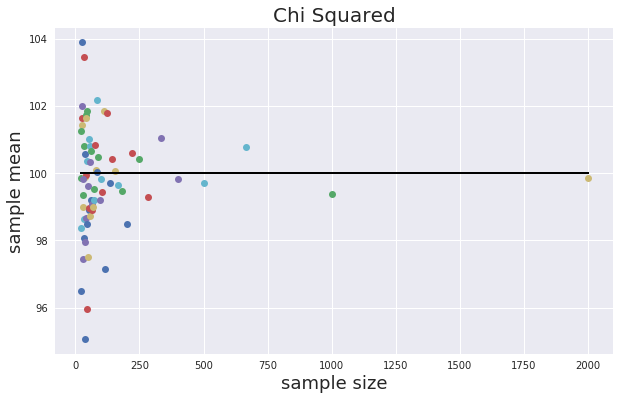

In [11]:
# overwriting dictionary into a nested dictionary
# dictionary will host the distributions
# each dictionary contains our 100 distributions (array of different sizes)
md['chisq'] = {}

# perform loop

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# saving means for plotting later

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        # we are plotting it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi Squared', fontsize=20)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: As distribution approaches a normal distribution, degrees of freedom increases

Text(0.5,1,'Mean of the Samples')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


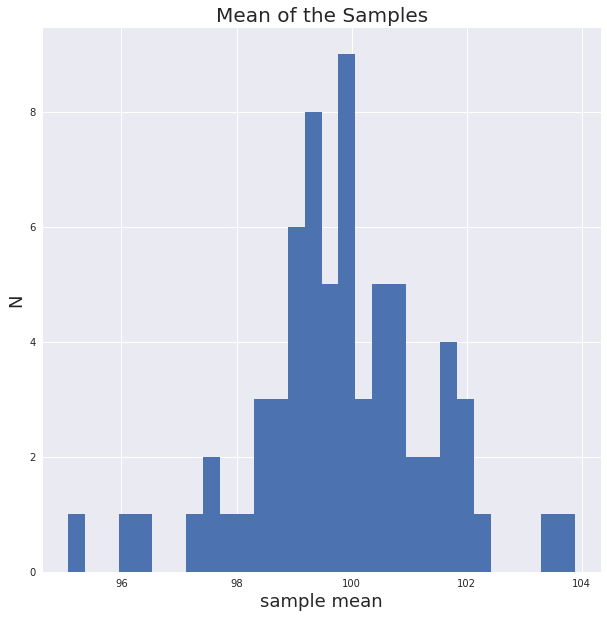

In [12]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Mean of the Samples', fontsize=20)

### Figure 3: Mean of samples are concentrated around the same mean

# Normal Distribution 

In [13]:
# choosing distributions = 'lnorm'
distributions = ['lnorm']

In [14]:
mymean = 100
# giving it a mean

In [15]:
loc = mymean
# putting distribution in a data frame


Text(0.5,1,'Mean of the Samples')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


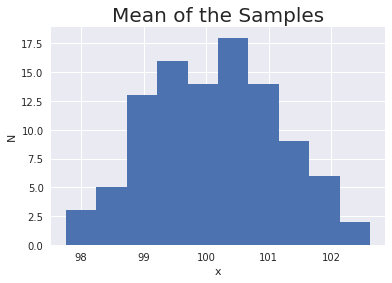

In [16]:
md = {}
# creating an empty dictionary
md['lnorm'] = np.random.normal(loc, size=100)
# padding gauss distribution to the dictionary
pl.hist(md['lnorm'])
pl.ylabel('N')
pl.xlabel('x')
pl.title('Mean of the Samples', fontsize=20)

### Figure 1: Gaussian distribution: df = 100, N=100

In [17]:
print ("lnorm mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))


lnorm mean: 100.16, standard deviation: 1.02


# Creating distributions from different sizes between 10 to 2000

In [18]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


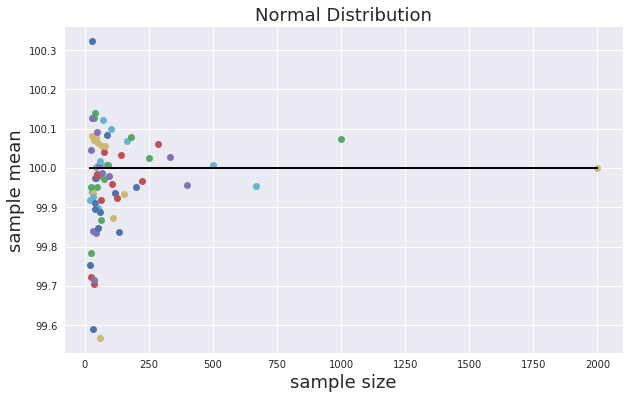

In [26]:
md['lnorm'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['lnorm'][n] = np.random.normal(loc, size = n)
    
# save the means for plotting later    

md['lnorm']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal Distribution', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [loc, loc], 'k')

### Figure 2: distributions are converging to the normal as the range increases¶

# Histogram of Sample Means

Text(0.5,1,'Mean of the Samples')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


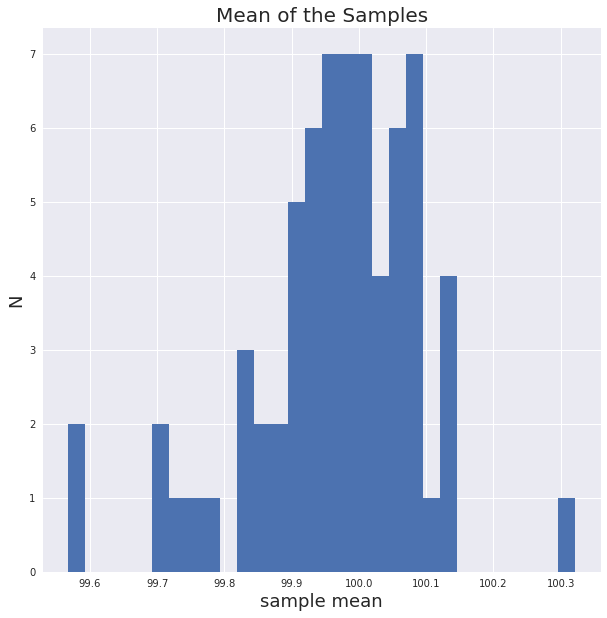

In [27]:
allmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Mean of the Samples', fontsize=20)

### Figure 3: Histogram of Normal Distribution of the Means

# Poisson Distribution

In [28]:
#distributions = ['pois']
distributions = ['pois']

In [29]:
mymean = 100

In [30]:
# the poisson distribution takes the expectations of interval, which luckily is the same as the mean!
lam = mymean

Text(0.5,1,'Mean of the Samples')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


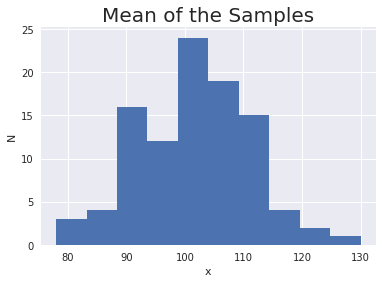

In [32]:
md = {}
# md is an empty disctionary
md['pois'] = np.random.poisson(lam, size=100)
# md now is a dictionary with one object: an array by the key 'pois'
pl.hist(md['pois'])
pl.ylabel('N')
pl.xlabel('x')
pl.title('Mean of the Samples', fontsize=20)

### Figure 1: Poisson distribution: lam = 100, N=100

### Calculating distributions of different sizes (all integers between 10 and 2000)


In [33]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


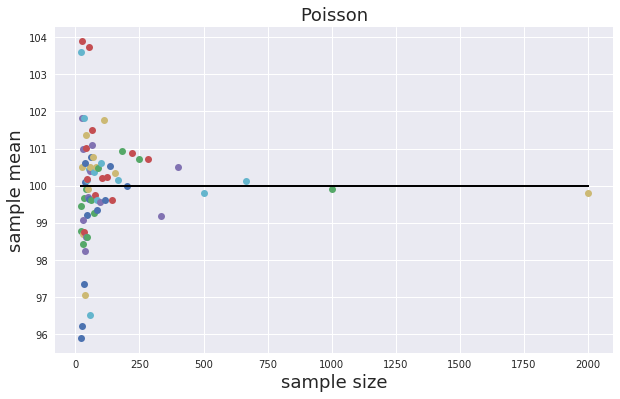

In [52]:
# Overwriting the dictionary and creating a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(lam, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')

### Figure 2: distributions are converging to the normal as the range increases

# Making histogram of all the means

Text(0.5,1,'Poisson distribution of the mean of all samples')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


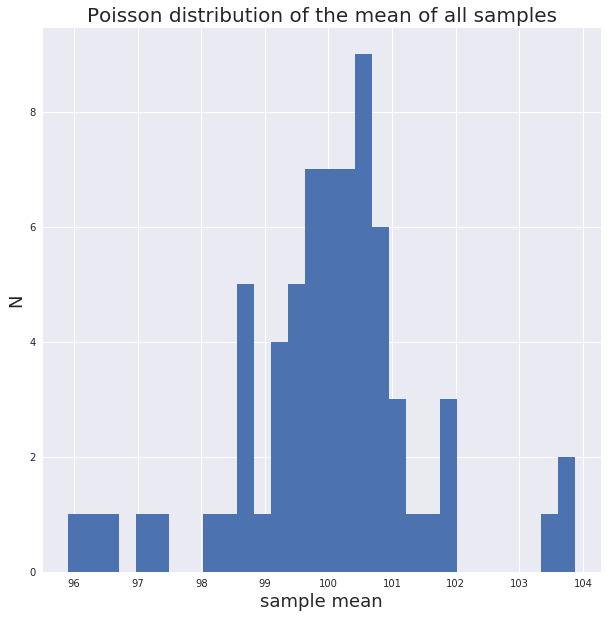

In [53]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Poisson distribution of the mean of all samples', fontsize=20)

### Figure 3: Histogram of all the means

# Binomial Distribution

In [38]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['binomial']

In [39]:
trials = 2000

In [40]:
# The binomial distribution's parameters: n trials and p probability of success 
mean = 100
tr = trials
p = .05

Text(0.5,1,'Binomial distribution of the mean of all samples')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


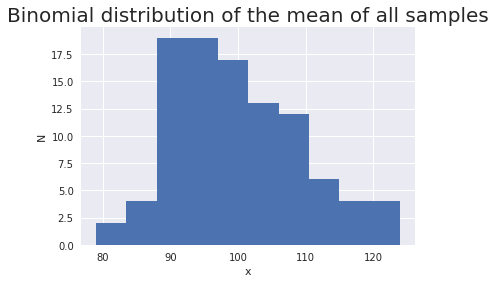

In [50]:
md = {}
# md is an empty disctionary
md['binomial'] = np.random.binomial(tr, p, size=100)
# md now is a dictionary with one object: an array by the key 'binomial'
pl.hist(md['binomial'])
pl.ylabel('N')
pl.xlabel('x')
pl.title('Binomial distribution of the mean of all samples', fontsize=20)

### Figure 1: Binomial Distribution

## Creating 100 Binomial Distributions

# Distributions of different sizes (all integers between 10 and 2000)

In [42]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


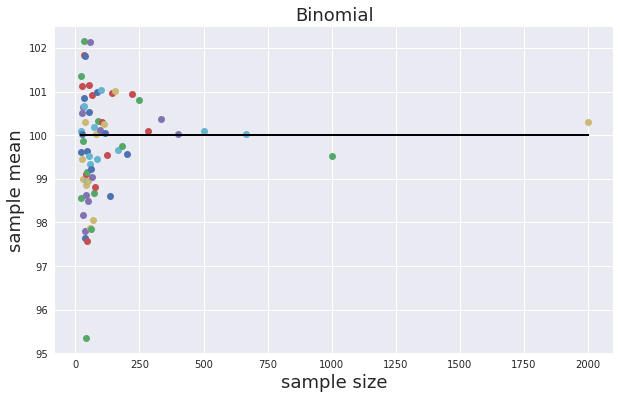

In [43]:
# Overwriting the dictionary entry created into a nested dictionary 
# The outside dictionary hosts the distributions as dictionary, 
# Each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.binomial(tr, p, size = n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

### Figure 2: distributions are converging to the normal as the range increases

# Histogram of the mean of all samples

Text(0.5,1,'Binomial distribution of the mean of all samples')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


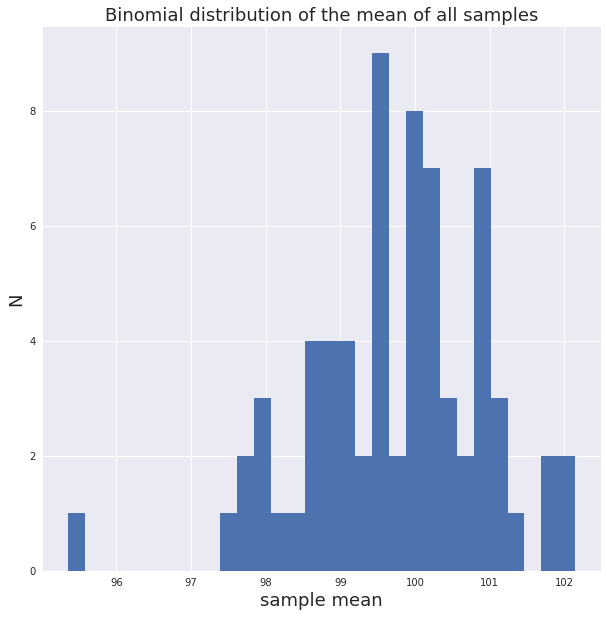

In [48]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Binomial distribution of the mean of all samples', fontsize=18)

### Figure 3: histogram of the mean of all samples for a binomial distribution

In [45]:
#distributions = cauchy
distributions = ['logistic']
loc = 100
scale = 1

Text(0.5,1,'Logistic distribution  of the mean of all samples')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


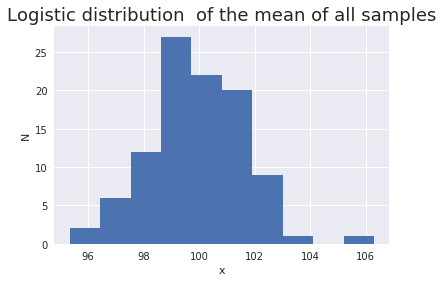

In [49]:
mdict = {}
# md is an empty disctionary
mdict['logistic'] = np.random.logistic(loc, scale, size = 100)
# mdict now is a dictionary with one object: an array by the key 'cauchy'
pl.hist(mdict['logistic'])
pl.ylabel('N')
pl.xlabel('x')
pl.title('Logistic distribution  of the mean of all samples', fontsize=18)

### Figure 1: Logistic distribution: N=100


# Distributions of different sizes (all integers between 10 and 2000)

In [54]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


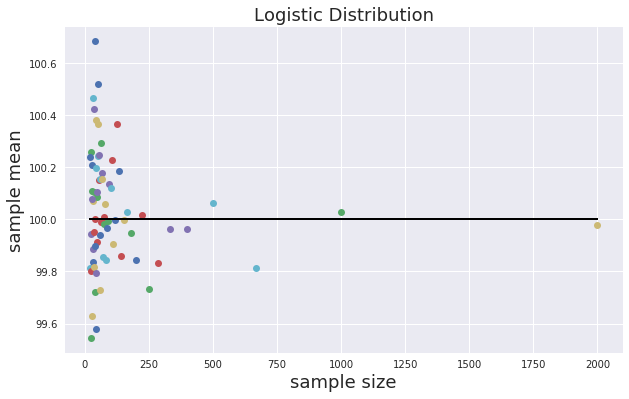

In [55]:
mdict['logistic'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    mdict['logistic'][n] = np.random.logistic(loc, scale, size = n)
    
# save the means for plotting later    

mdict['logistic']['means'] = {}
axlogistic_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mdict['logistic']:
    if not type(nn) == str:
        mdict['logistic']['means'][nn] = mdict['logistic'][nn].mean()
        #and plot it
        axlogistic_mu_n.plot(nn, mdict['logistic']['means'][nn], 'o')
        axlogistic_mu_n.set_xlabel('sample size', fontsize=18)
        axlogistic_mu_n.set_ylabel('sample mean', fontsize=18)
        axlogistic_mu_n.set_title('Logistic Distribution', fontsize=18)
        axlogistic_mu_n.plot([min(mysize), max(mysize)], [loc,loc],'k')

### Figure 2: distributions are converging to the normal as the range increases


## Histogram of all samples

Text(0.5,1,'Logistic histogram of the mean of all samples')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


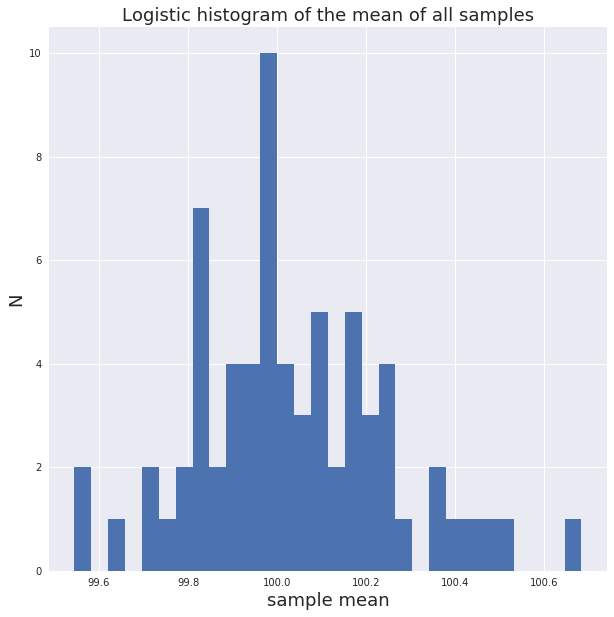

In [56]:
allmeans = list(mdict['logistic']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Logistic histogram of the mean of all samples', fontsize=18)

### Figure 3: histogram of the mean of all samples for a logistic distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


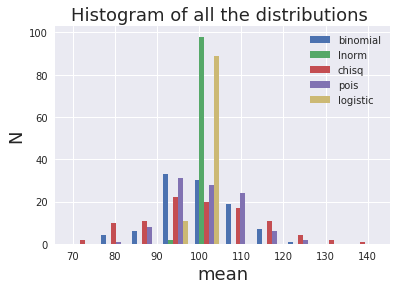

In [57]:
md1 = {}
# empty disctionary
md1['binomial'] = np.random.binomial(tr, p, size=100)

md2 = {}
# creating an empty dictionary
md2['lnorm'] = np.random.normal(loc, size=100)


md3 = {}
# empty dictionary
md3['chisq'] = np.random.chisquare(df, size=100)

md4 = {}
# empty disctionary
md4['pois'] = np.random.poisson(lam, size=100)

md5 = {}
# creating empty dictionary
md5['logistic'] = np.random.logistic(loc, scale, size = 100)


plt.hist([md1['binomial'],md2['lnorm'],md3['chisq'],md4['pois'],md5['logistic']], bins = 10, label=['binomial', 'lnorm', 'chisq', 'pois', 'logistic'])
plt.legend(loc='upper right')
pl.xlabel('mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Histogram of all the distributions ', fontsize=18)
plt.show()